<a href="https://colab.research.google.com/github/saadahmedsh/logistic_regression/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

dataset_1=files.upload()
dataset_2=files.upload()

df_1=pd.read_csv('ex2data1.txt')
df_2=pd.read_csv('ex2data2.txt')



Saving ex2data1.txt to ex2data1.txt


Saving ex2data2.txt to ex2data2.txt


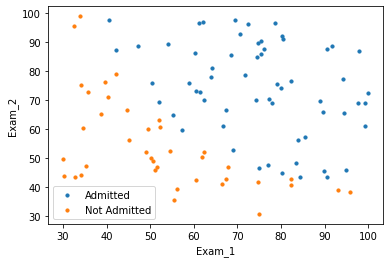

In [ ]:
#visualizing the data
import numpy as np
import matplotlib.pyplot as plt

x = df_1.iloc[:, :-1]
y = df_1.iloc[:, -1]
m=len(df_1)
z=np.ones(m)
z=z.reshape(m,1)
x=np.append(z,x, axis=1)
theta=np.zeros(x.shape[1])
theta=theta.reshape(x.shape[1], 1)
m=df_1.shape[0]
admitted = df_1.loc[y == 1]
not_admitted = df_1.loc[y == 0]
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.xlabel('Exam_1')
plt.ylabel('Exam_2')
plt.legend()
plt.show()


In [ ]:
def predicted_value(x,theta):
  return sigmoid(np.dot(x, theta))  #calculates sigmoid of hypothesis

In [ ]:
def sigmoid(n):
  return 1 / (1 + np.exp(-n))

In [ ]:
def cost_function():
  cost=0
  for i in range(0, len(x)):
    cost += y[i] * np.log(predicted_value(x[i], theta)) + (1 - y[i]) * np.log(
            1 - predicted_value(x[i], theta) + 0.1)
  cost *= -(1 / m) 
  return cost

cost_function()


array([0.62132354])

In [ ]:
learning_rate=0.1
iterations=10000

In [ ]:
def gradient_descent(theta):
  for j in range(0,iterations):
    for i in range(0, 99):
      predicted = sigmoid(np.dot(x[i], theta)) - y[i]
      gradient = (predicted * x[i].reshape(3,1)) 
      theta -= (gradient * learning_rate/m)
    
    

gradient_descent(theta)
theta


array([[-26.67068018],
       [  0.27078918],
       [  0.23098585]])

In [ ]:
cost_function()

array([0.34030953])

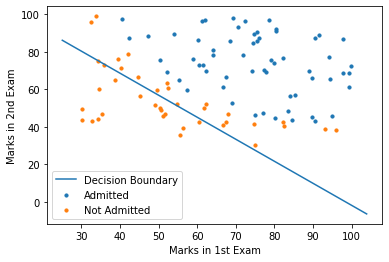

In [ ]:
x_values = [np.min(x[:, 1] - 5), np.max(x[:, 2] + 5)]
y_values = - (theta[0] + np.dot(np.array(x_values).reshape(2,1), theta[1])) / theta[2]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
admitted = df_1.loc[y == 1]
not_admitted = df_1.loc[y == 0]
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()


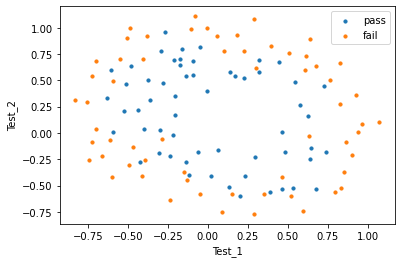

In [ ]:
x_2 = df_2.iloc[:, :-1]
y_2 = df_2.iloc[:, -1]
m=len(df_2)
passed = df_2.loc[y_2 == 1]
failed = df_2.loc[y_2  == 0]
plt.scatter(passed.iloc[:, 0], passed.iloc[:, 1], s=10, label='pass')
plt.scatter(failed.iloc[:, 0], failed.iloc[:, 1], s=10, label='fail')
plt.xlabel('Test_1')
plt.ylabel('Test_2')
plt.legend()
plt.show()



In [ ]:
feature_1=x_2[x_2.columns[0]]
feature_2=x_2[x_2.columns[1]]

In [ ]:
def map_feature(degree):
    features = np.ones(x_2.shape[0])[:,np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            features = np.hstack((features, np.multiply(np.power(feature_1, i-j),np.power(feature_2, j))[:,np.newaxis]))
    return features
hypothesis_features = map_feature(6)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


In [ ]:
theta=np.zeros(hypothesis_features.shape[1])
__lambda=0.1
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
learning_rate=0.1

In [ ]:
def cost_function_regularzied():
  cost = 0
  regularized_feature = 0
  for i in range(0, len(hypothesis_features)):
    cost += y_2[i] * np.log(predicted_value(hypothesis_features[i], theta)) + (1 - y_2[i]) * np.log(
            1 - predicted_value(hypothesis_features[i], theta) + 0.1)
    regularized_feature += theta**2
  cost *= -(1 / m)
  regularized_feature += __lambda/(2*m)
  cost + regularized_feature
  return cost


  

In [ ]:
def gradient_descent_regularized(theta):
  for j in range(0,iterations):
    for i in range(0, 99):
      predicted = sigmoid(np.dot(hypothesis_features[i], theta)) - y_2[i]
      gradient = predicted * hypothesis_features[i]
      gradient += (__lambda / m) * theta
      theta -= (gradient * learning_rate/m)


gradient_descent_regularized(theta)

In [ ]:
cost_function_regularzied()

0.293047762499692

In [ ]:
theta

array([ 3.14235632,  1.23423752,  2.35226488, -3.50251039, -2.31556917,
       -4.4648039 ,  0.72268564, -1.11845522, -1.22538163, -0.13431373,
       -3.27010757,  0.21316165, -1.69215938, -0.88951697, -2.71093052,
       -0.67060124, -0.51538694,  0.16456776, -0.89592453, -1.19238523,
       -0.08861211, -2.75098469,  0.23370078, -0.72070879,  0.22754203,
       -0.99254689, -0.69598894, -1.25755131])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Legend does not support     0.051267   0.69956  1
0  -0.092742  0.684940  1
1  -0.213710  0.692250  1
2  -0.375000  0.502190  1
3  -0.513250  0.465640  1
4  -0.524770  0.209800  1
5  -0.398040  0.034357  1
6  -0.305880 -0.192250  1
7   0.016705 -0.404240  1
8   0.131910 -0.513890  1
9   0.385370 -0.565060  1
10  0.529380 -0.521200  1
11  0.638820 -0.243420  1
12  0.736750 -0.184940  1
13  0.546660  0.487570  1
14  0.322000  0.582600  1
15  0.166470  0.538740  1
16 -0.046659  0.816520  1
17 -0.173390  0.699560  1
18 -0.478690  0.633770  1
19 -0.605410  0.597220  1
20 -0.628460  0.334060  1
21 -0.593890  0.005117  1
22 -0.421080 -0.272660  1
23 -0.115780 -0.396930  1
24  0.201040 -0.601610  1
25  0.466010 -0.535820  1
26  0.673390 -0.535820  1
27 -0.138820  0.546050  1
28 -0.294350  0.779970  1
29 -0.265550  0.962720  1
30 -0.161870  0.801900  1
31 -0.173390  0.648390  1
32 -0.282830  0.472950  1
33 -0.363480  

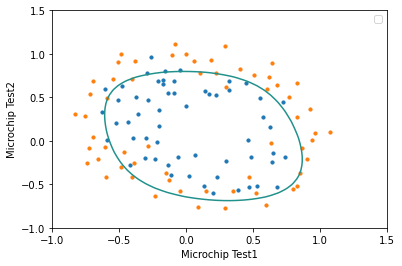

In [ ]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
def mapFeatureForPlotting(X1, X2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j]), theta)
passed = df_2.loc[y_2 == 1]
failed = df_2.loc[y_2  == 0]
plt.scatter(passed.iloc[:, 0], passed.iloc[:, 1], s=10, label='pass')
plt.scatter(failed.iloc[:, 0], failed.iloc[:, 1], s=10, label='fail')
plt.contour(u,v,z,0)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()